# `Business Case: LoanTap Logistic Regression`

## Defining Problem Statement and Analyzing basic metrics

###	 Business Problem
<font color='Blue'>
<br>
    
* LoanTap is an online platform committed to delivering customized loan products to millennials.<br> They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly <br> terms to salaried professionals and businessmen.

* The data science team at LoanTap is building an underwriting layer to determine the  <br>creditworthiness of MSMEs as well as individuals.
</font>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [25]:
df = pd.read_csv("C:/Scaler_DSML/Project/Taploan_LogReg/Taploan_LogReg.txt")
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


###	Analyzing basic metrics

##### o	Shape of data: Total of 396030  rows × 27 columns

##### o	Data types of all the attributes as received in source: 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [27]:
### Dropping column 'address' as values, do not add value to our prob statement

In [28]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

### Identifying the `Missing values` across the all variables: 

In [29]:
# For getting Columns having at least 1 null value
# df.isna().sum()
# pd.isnull(df).sum()[pd.isnull(df).sum() > 0]
# df.columns[df.isnull().any()].tolist()


# For getting Columns with count, with having at least 1 null value.
df[df.columns[df.isnull().any()]].isnull().sum()

emp_title               22927
emp_length              18301
title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

#### Checking null percentage

In [30]:
# For getting percentage of the null count.
# df.isnull().mean()*100

df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

#### Display Row and Columns with null values
#### 60162 out of 396030 rows have null values hence we can drop null rows.

In [31]:
# Display all rows where title column has null values
# df[df.title.isna()]
# Display all row and col with atleast 1 null values
df[df.isna().any(axis=1)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
22,4200.0,36 months,6.99,129.67,A,A3,midstate steel llc,5 years,OWN,24000.00,...,6.0,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\r\nJenniferbury, AL 05113"
25,6000.0,36 months,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.00,...,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,..."
32,3000.0,36 months,6.03,91.31,A,A1,American Heart Association,1 year,OWN,64000.00,...,6.0,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\r\nShaunbury, NH 2..."
35,5375.0,36 months,13.11,181.39,B,B4,NaN,NaN,RENT,34000.00,...,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\r\nWest John, MS 05113"
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.00,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395999,11125.0,36 months,24.11,437.11,F,F2,NaN,NaN,MORTGAGE,31789.88,...,8.0,0.0,22385.0,81.0,24.0,w,INDIVIDUAL,4.0,0.0,"1314 Bridget Terrace\r\nRebeccashire, NE 30723"
396015,4000.0,36 months,9.16,127.50,B,B2,NaN,NaN,MORTGAGE,57400.00,...,12.0,0.0,3134.0,5.8,27.0,w,INDIVIDUAL,5.0,0.0,Unit 4067 Box 2110\r\nDPO AA 05113
396016,3000.0,36 months,5.42,90.48,A,A1,Saint Paul Public Schools,10+ years,MORTGAGE,70000.00,...,9.0,0.0,4062.0,12.6,23.0,f,INDIVIDUAL,NaN,0.0,"2672 Jennifer River\r\nJoannemouth, AK 70466"
396021,3200.0,36 months,5.42,96.52,A,A1,St Francis Medical Center,10+ years,RENT,33000.00,...,18.0,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\r\nWest Marc, NY 00813"


### Count duplicate rows on entire dataframe:

In [32]:
len(df)-len(df.drop_duplicates())

0

### Checking the unique value counts in columns
* We’ll remove columns with only one unique value because their variance<br>
    will be 0 and they won’t help us anticipate anything.

In [33]:
data = df
featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :",cols_to_drop)

Columns having 1 unique value are : []


## >>`Understand Categorical features relation with (Loan_Status) ` <<

In [34]:
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

In [35]:
df[cat_cols[:8]].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d
count,396030,396030,396030,373103,377729,396030,396030,396030
unique,2,7,35,173105,11,6,3,115
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014
freq,302005,116018,26655,4389,126041,198348,139563,14846


In [36]:
df[cat_cols[8:]].describe()

,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,394275,396030,396030,396030,396030
unique,2,14,48817,684,2,3,393700
top,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,318357,234507,152472,3017,238066,395319,8


## > Dropping Variable 'address', 'issue_d', 'earliest_cr_line'

* 'address' can be dropped as all the values are unique.
* total count is 335868 and unique count is 334143. Hence dropping 'address'
* 'issue_d', The month which the loan was funded will not have impact on the target var.

In [37]:
df.drop('address', axis =1, inplace= True)

In [38]:
df.drop('issue_d', axis =1, inplace= True)

In [39]:
df.drop('earliest_cr_line', axis =1, inplace= True)

In [40]:
# Resetting cat_cols list after dropping address
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

# Bivariate Analysis
# [Categorical features vs Target variable]

### > Variable 'term' vs 'loan_status'
* 19% of the loans are 'Charged Off' while 80% are'Fully Paid'
* 29% of the '60 month' term loans are 'Charged Off'.

<AxesSubplot:xlabel='term'>

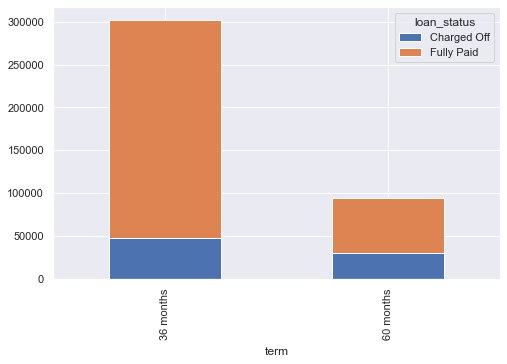

In [41]:
# sns.displot(df, x='term', hue='loan_status', multiple='stack')
sns.set(rc={'figure.figsize':(8,5)})
pd.crosstab(df['term'], df['loan_status']).plot(kind='bar', stacked=True)

In [42]:
pd.crosstab(df['term'], df['loan_status'],margins = True,normalize='all').round(4)*100

loan_status,Charged Off,Fully Paid,All
term,,,
36 months,12.03,64.23,76.26
60 months,7.58,16.16,23.74
All,19.61,80.39,100.00


### > Variable 'grade' do have impact on 'loan_status'

<AxesSubplot:xlabel='grade'>

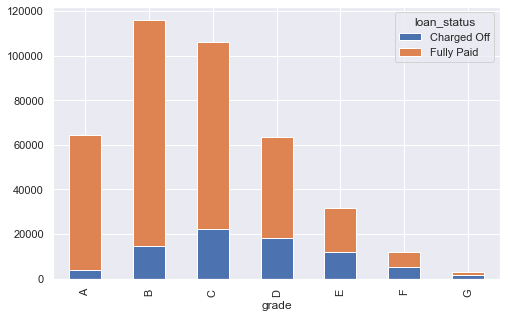

In [43]:
pd.crosstab(df['grade'], df['loan_status']).plot(kind='bar', stacked=True)

In [44]:
pd.crosstab(df['grade'], df['loan_status'],margins = True,normalize='all').round(4)*100

loan_status,Charged Off,Fully Paid,All
grade,,,
A,1.02,15.19,16.21
B,3.68,25.61,29.30
C,5.67,21.09,26.76
D,4.63,11.41,16.04
E,2.97,4.98,7.95
F,1.27,1.70,2.97
G,0.37,0.40,0.77
All,19.61,80.39,100.00


### > Variable 'verification_status' do not have significant impact on 'loan_status'

<AxesSubplot:xlabel='verification_status'>

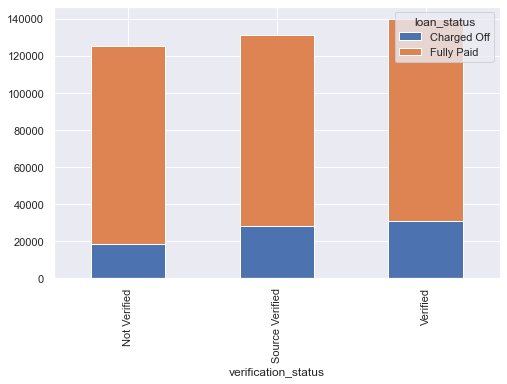

In [45]:
pd.crosstab(df['verification_status'], df['loan_status']).plot(kind='bar', stacked=True)

In [46]:
pd.crosstab(df['verification_status'], df['loan_status'],margins = True,normalize='all').round(4)*100

loan_status,Charged Off,Fully Paid,All
verification_status,,,
Not Verified,4.62,26.96,31.58
Source Verified,7.12,26.05,33.18
Verified,7.87,27.37,35.24
All,19.61,80.39,100.00


###  > Variable 'home_ownership' do have significant impact on 'loan_status'

<AxesSubplot:xlabel='home_ownership'>

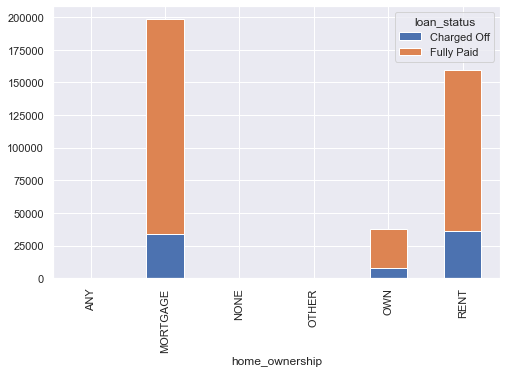

In [47]:
pd.crosstab(df['home_ownership'], df['loan_status']).plot(kind='bar', stacked=True)

In [48]:
pd.crosstab(df['home_ownership'], df['loan_status'],margins = True,normalize='all').round(4)*100

loan_status,Charged Off,Fully Paid,All
home_ownership,,,
ANY,0.00,0.00,0.00
MORTGAGE,8.49,41.59,50.08
NONE,0.00,0.01,0.01
OTHER,0.00,0.02,0.03
OWN,1.97,7.56,9.53
RENT,9.14,31.20,40.35
All,19.61,80.39,100.00


### > Variable 'initial_list_status' do not have significant impact on 'loan_status'

<AxesSubplot:xlabel='initial_list_status'>

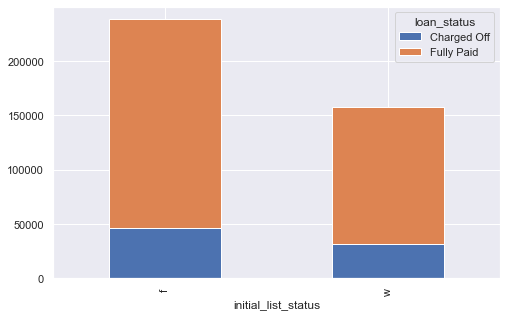

In [49]:
pd.crosstab(df['initial_list_status'], df['loan_status']).plot(kind='bar', stacked=True)

### > Variable 'application_type' do not have significant impact on 'loan_status'

<AxesSubplot:xlabel='application_type'>

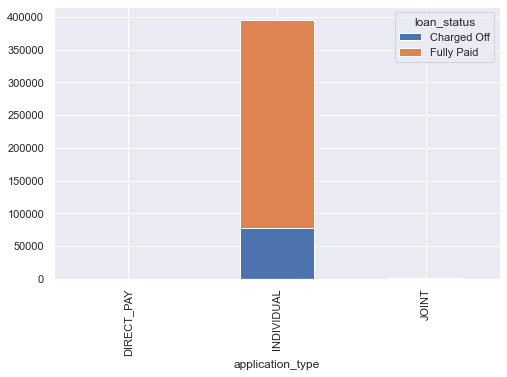

In [50]:
pd.crosstab(df['application_type'], df['loan_status']).plot(kind='bar', stacked=True)

# [ Numerical Feature vs Target variable ]

In [51]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

In [52]:
df[num_cols[:6]].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000


In [53]:
df[num_cols[6:]].describe()

,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## >`Check correlation in features how they interact with each other` <

* Total of 12 numerical variable. 
* No variable has strong linear relation with other variable
* There are outliers in data. 

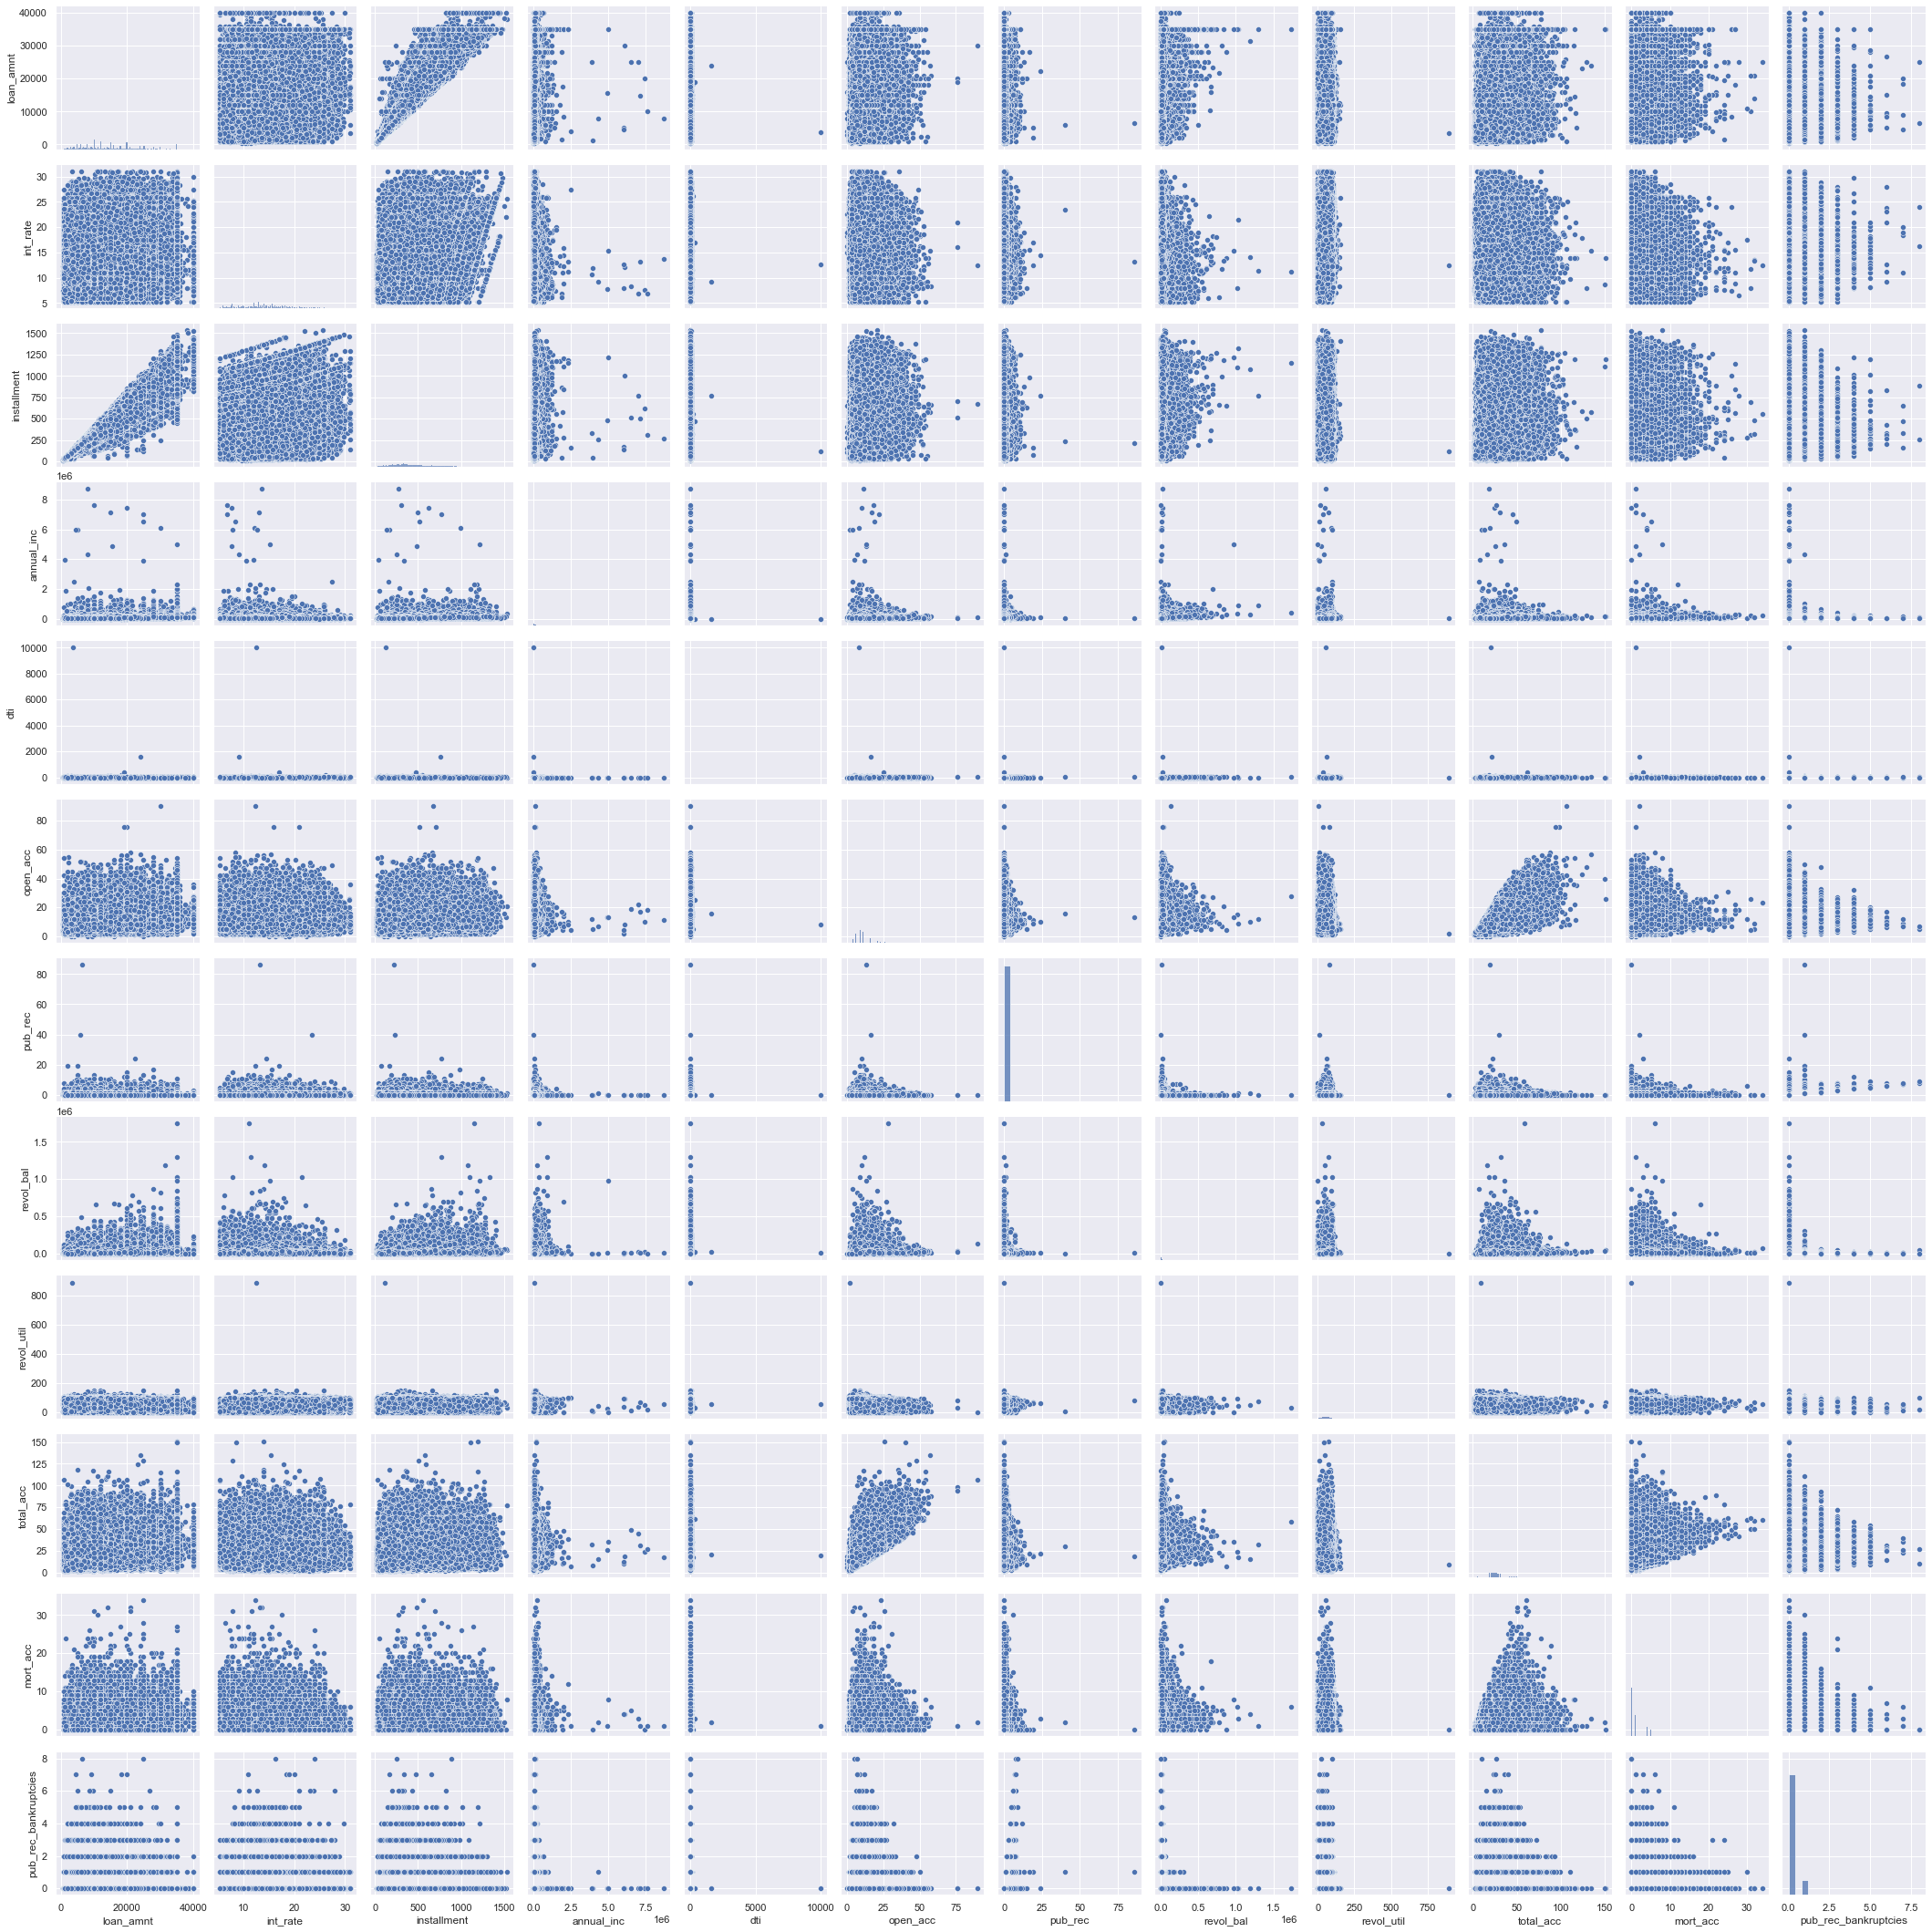

In [54]:
sns.pairplot(data=df)
plt.show()

<AxesSubplot:>

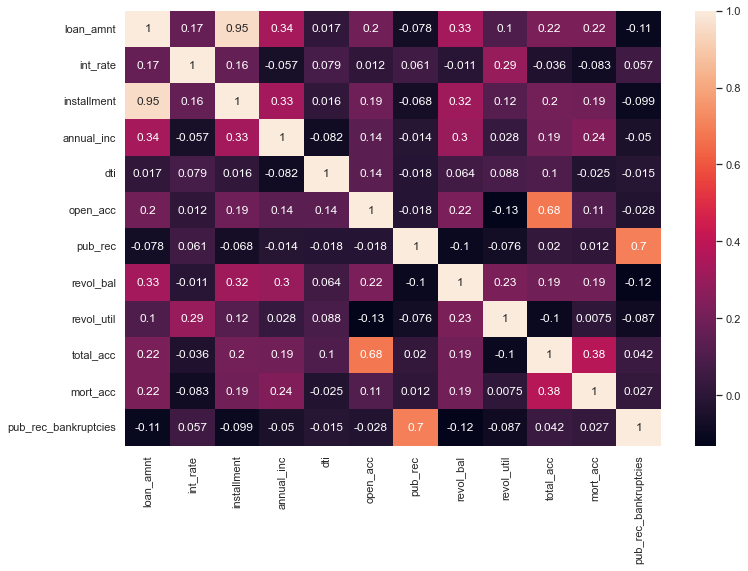

In [55]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot = True)

In [56]:
# sns.set(rc={'figure.figsize':(6,5)})
# sns.boxplot(x="loan_status",y="mort_acc",data=df)

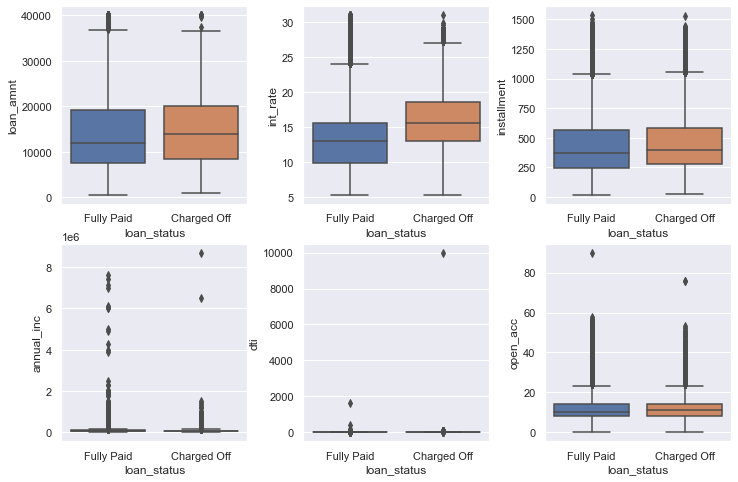

In [57]:
sns.set(rc={'figure.figsize':(12,8)})
names = df[num_cols[:6]].columns
ncols = len(names)
fig, axes = plt.subplots(2,3)
plt.subplots_adjust(wspace=0.3)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, x= "loan_status", data=df, orient='v', ax=ax)

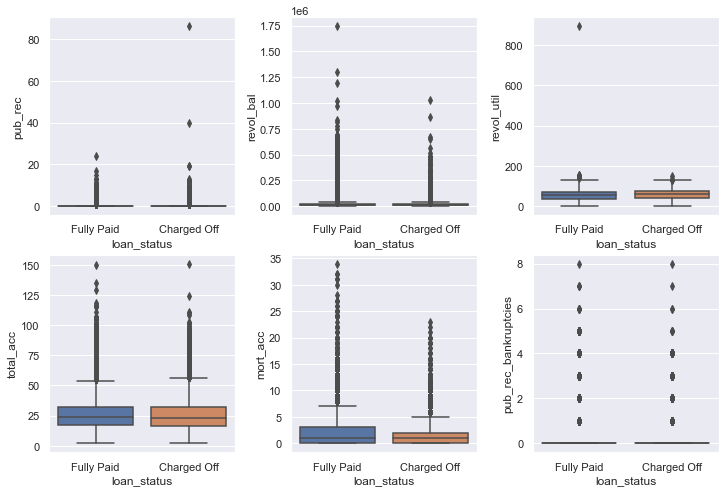

In [58]:
sns.set(rc={'figure.figsize':(12,8)})
names = df[num_cols[6:]].columns
ncols = len(names)
fig, axes = plt.subplots(2,3)
plt.subplots_adjust(wspace=0.3)
for name, ax in zip(names, axes.flatten()):
    
    sns.boxplot(y=name, x= "loan_status", data=df, orient='v', ax=ax)

### Updating features:

In [59]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0.0 if x < 1.0 else 1.0)

In [60]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0.0 if x < 1.0 else 1.0)
df['mort_acc'] = df['mort_acc'].apply(lambda x: 0.0 if x < 1.0 else 1.0)

In [61]:
# Missing Values in df['mort_acc'] have been removed. 
df['mort_acc'].isna().sum()

0

In [62]:
# data["diagnosis"] = data["diagnosis"].map({'B':0,'M':1}).astype(int)

### Drop null rows:

In [63]:
# Drop rows with null values
df.dropna(inplace=True)

In [64]:
# Checking null rows after dropping
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

## Updating Categorical variable with 
### LabelEncoder, TargetEncoder, One Hot Encoding

In [65]:
le = LabelEncoder()
te = TargetEncoder()

C:\Users\Alok\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Alok\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [66]:
# LabelEncoder
df[['term','initial_list_status','loan_status']] = df[['term','initial_list_status','loan_status']].apply(le.fit_transform)

# TargetEncoder
col = ['sub_grade','emp_title','emp_length','purpose','title','application_type']
df[col] = te.fit_transform(df[col], df['loan_status'])

# One hot encoding
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
df = pd.get_dummies(df, columns=cat_cols)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371126 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            371126 non-null  float64
 1   term                                 371126 non-null  int32  
 2   int_rate                             371126 non-null  float64
 3   installment                          371126 non-null  float64
 4   sub_grade                            371126 non-null  float64
 5   emp_title                            371126 non-null  float64
 6   emp_length                           371126 non-null  float64
 7   annual_inc                           371126 non-null  float64
 8   loan_status                          371126 non-null  int32  
 9   purpose                              371126 non-null  float64
 10  title                                371126 non-null  float64
 11  dti          

### Defining X and Y of our data:

In [68]:
x=df.drop(['loan_status'],axis=1)
y=df[['loan_status']]

In [69]:
x.shape, y.shape

((371126, 36), (371126, 1))

### Train, Validation, Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)

In [71]:
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Validation data:{X_val.shape}, {y_val.shape}')
print(f'Test data:{X_test.shape}, {y_test.shape}')

Training data: (222675, 36), (222675, 1)
Validation data:(74225, 36), (74225, 1)
Test data:(74226, 36), (74226, 1)


### >> Checking target 'loan_status' variable balance
* Data is not balanced
* 80% data for fully paid, 20% for'Charged Off'
* We need to balance the data. 
* "Weighted Loss"  can be used to balance the data.

In [72]:
y_train.value_counts(normalize=True),y_train.value_counts()

(loan_status
 1              0.807509
 0              0.192491
 dtype: float64,
 loan_status
 1              179812
 0               42863
 dtype: int64)

## Since We have Imbalanced data 
* we can use "Weighted Loss" method to balance out data for both class
* Ratio of class with more number of samples to the class with less number of samples 

In [73]:
# Ratio = 179812/42863 = 4
179812/42863

4.195040011198469

In [74]:
# minority class needs more re-weighting 

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:4, 1:1 }))
    scaled_lr.fit(X_train, np.ravel(y_train,order='C'))
    train_y_pred = scaled_lr.predict(X_train)
    val_y_pred = scaled_lr.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

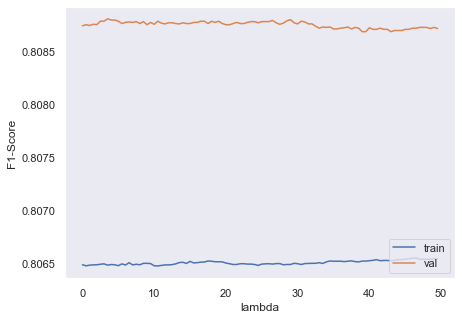

In [75]:
#plotting
plt.figure(figsize=(7, 5))
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

* Train score is 0.80
* Validation score 0.80 and same as train score

In [76]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.8088031743102335


### Using the best Regularization parameter on Test data and predict Target

* we see the performance of the model on test data

In [77]:
# Model with lambda_best
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx

model = LogisticRegression(C=1/l_best, class_weight={ 0:4, 1:1 })
model.fit(X_train, np.ravel(y_train,order='C'))

LogisticRegression(C=0.2849002849002849, class_weight={0: 4, 1: 1})

In [78]:
y_pred_test = model.predict(X_test)
test_score = f1_score(y_test, y_pred_test)
print("F1 Score : ", test_score)

F1 Score :  0.8064020154493081


In [79]:
X_train

array([[-0.93689332, -0.56686933,  0.14740487, ...,  1.43203302,
        -0.71506707, -0.70797864],
       [-1.09825827, -0.56686933,  0.37313932, ..., -0.69830792,
        -0.71506707,  1.412472  ],
       [-0.50658678, -0.56686933, -1.22041177, ...,  1.43203302,
        -0.71506707, -0.70797864],
       ...,
       [ 0.68870914,  1.76407499,  1.79459583, ..., -0.69830792,
         1.39847022, -0.70797864],
       [ 1.2863571 ,  1.76407499,  2.08067513, ..., -0.69830792,
        -0.71506707,  1.412472  ],
       [-0.2376452 , -0.56686933, -0.81587777, ..., -0.69830792,
        -0.71506707,  1.412472  ]])

Display model coefficients with column names

In [80]:
coef_table = pd.DataFrame(list(x.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

#### Model Intercept and Coef list with column names

In [81]:
model.intercept_

array([0.4052279])

### Following are the Important features
* emp_title, sub_grade,title, int_rate, loan_amnt.
* emp_title with value '0.675' has the highest impact on the loan_status target variable.
* sub_grade with value '0.556' has the second highest impact on the loan_status target variable.

In [82]:
coef_table

,0,Coefs
0,loan_amnt,0.108475
1,term,-0.252185
2,int_rate,0.101397
3,installment,-0.200913
4,sub_grade,0.554925
5,emp_title,0.791100
6,emp_length,0.052728
7,annual_inc,0.088043
8,purpose,-0.060198
9,title,0.367467


### > Lets check the Precision score for model
* We have 0.90 Precision
* Precision is the ability to get the highest ratio of loan payers in the campaign, <br>Alternatively, precision aims to not mistake anyone as payer.

In [83]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, model.predict(X_test))
precision

0.9049935553615235

### > Lets check the Recall score for model
* We have 0.72 recall
* Recall is the ability to not miss out on loan payers.Recall aims to not mistake anyone as defaulters.<br> Your precision is the hit rate of loan payers while recall is the capture rate of loan payers.

In [84]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, model.predict(X_test))
recall

0.7271816116530803

#### Let's look at this confusion matrix for the data.

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, model.predict(X_test))
print(conf_mat)

[[ 9792  4570]
 [16332 43532]]


### > Accuracy score
* We have 0.71 accuracy.

In [86]:
np.diag(conf_mat).sum() / conf_mat.sum()

0.718400560450516

### > F1 score : 

In [87]:
from sklearn.metrics import f1_score
print('F1 score:',f1_score(y_test, model.predict(X_test)))

F1 score: 0.8064020154493081


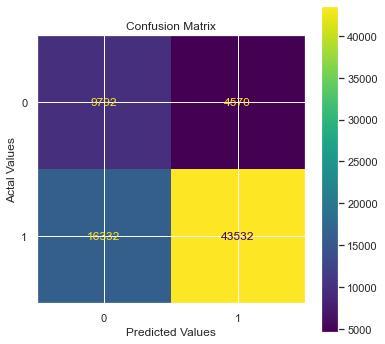

In [88]:
#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
cmp = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2))
cmp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Using Precision, Recall, F1-Score as metric

* classification_report

In [89]:
from sklearn.metrics import fbeta_score
print(classification_report(y_test,y_pred_test))
f2 = fbeta_score(y_test,y_pred_test,beta=2)
print(f"F2: {f2}")

              precision    recall  f1-score   support

           0       0.37      0.68      0.48     14362
           1       0.90      0.73      0.81     59864

    accuracy                           0.72     74226
   macro avg       0.64      0.70      0.65     74226
weighted avg       0.80      0.72      0.74     74226

F2: 0.7569255593654148


In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [91]:
pred_prob2 = model.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test,np.ravel(pred_prob2[:,1]))

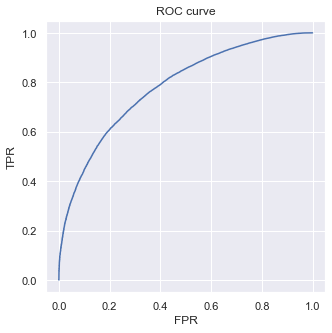

In [92]:
plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [93]:
roc_auc_score(y_test,np.ravel(pred_prob2[:,1]))

0.7821496969047774

## > Precision - Recall curve

* Area under Curve:  0.93
* A high area under the curve represents both high recall and high precision.

In [94]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [95]:
precision, recall, thr = precision_recall_curve(y_test,np.ravel(pred_prob2[:,1]))

Area under Curve:  0.9336510071794651


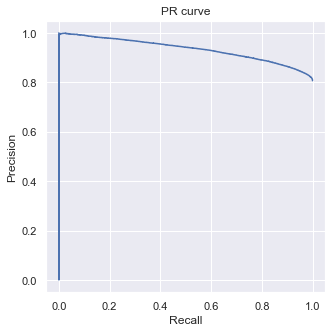

In [96]:
print('Area under Curve: ', auc(recall, precision))

plt.subplots(figsize=(5,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------
## Tradeoff Questions:

#### 1. How can we make sure that our model can detect real defaulters and there are less false positives?

* We should focus on giving loans to profiles with good salary and strong credit score. 
* Data we have is highly imbalanced dataset. A Good balanced data to be used for good model prediction.
* We can also try different classification like DT, KNN which perform better with imbalanced data.

#### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and <br>shouldn’t disburse loans to anyone. 

* To give loans to profiles with strong credit score with stable job and at good designation .
* To reduce NPA we can reduce the interest rate which will encourage borrower's to pay back loans. 

#### ---------------------------------------------------------------------------------------------------------------------------
## Actionable Insights & Recommendations

* Lower interest rates have less NPA/ loan defaulters.
* Installments are highly correlated to loan amounts.
* Borrower's who live on rent are likely to loan default.
* 'sub_grade' has high impact on predicting target var loan status.
* To reduce NPA we can reduce the interest rate which will encourage borrower's to pay back loans. 
* home_ownership with 'MORTGAGE' high impact on predicting target var loan status.
* home_ownership with 'RENT' negative impact on predicting target var loan status.


### Questionnaire 

* What percentage of customers have fully paid their Loan Amount? 
* Ans(80% )

* Comment about the correlation between Loan Amount and Installment features.?
* Ans : 0.95% correlation. They have a liner relation.

* The majority of people have home ownership as : "MORTGAGE".
* People with grades ‘A’ are more likely to fully pay their loan. : True
* Name the top 2 afforded job titles. : [Teacher / Managers]
* Thinking from a bank's perspective, which metric should our primary focus be on..[Precision]
* How does the gap in precision and recall affect the bank? <br> 
Answer: The higher the precision the less likely it is to recruit defaulters, but the potential <br> client pool becomes smaller. The higher the recall, the larger the potential pool of clients but the higher the risk of  <br> recruiting defaulters.


* Which were the features that heavily affected the outcome? 
 Ans : [emp_title, sub_grade,title, int_rate, loan_amnt.]
* Will the results be affected by geographical location? (No)
* We have had all most all address to be unique. Hence location will have no impact on results